In [0]:
from fastai.vision import *
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
classes=["Bacterial leaf spot","Black leaf rot","Brown leaf spot","Mosaic virus","Powdery mildew",
         "Rust","Sunburn","Scale insect","Water problem"]

In [0]:
PATH=Path("/content/gdrive/My Drive/plantDoctor - Disease/model2")
for c in classes:
    print(c)
    verify_images(PATH/c,delete=True)

Bacterial leaf spot


Black leaf rot


Brown leaf spot


Mosaic virus


Powdery mildew


Rust


Sunburn


Scale insect


Water problem


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(PATH, train=".",valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# Train Model - resnet34

In [0]:
learn = cnn_learner(data, models.resnet34,metrics=error_rate)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


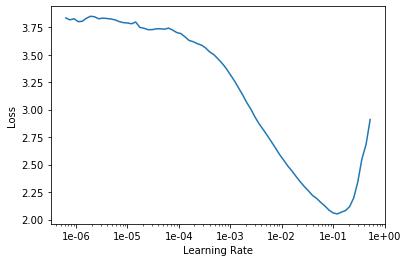

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(20, max_lr=slice(1e-03,1e-1/2))

epoch,train_loss,valid_loss,error_rate,time
0,1.138706,0.508403,0.155689,00:37
1,0.721590,0.459046,0.147705,00:37
2,0.616205,0.445571,0.129741,00:38
3,0.641625,0.905416,0.163673,00:37
4,0.828893,1.055951,0.187625,00:37
5,0.743317,0.682020,0.165669,00:36
6,0.618467,0.420209,0.099800,00:36
7,0.515295,0.367612,0.119760,00:37
8,0.483084,0.512761,0.177645,00:37
9,0.475402,0.323023,0.077844,00:36


## Save

In [0]:
learn_model_dir='/content/gdrive/My Drive/plantDoctor - Disease/model2'
learn.save('disease_model',learn_model_dir)

learn.export()

## Testing

In [0]:
path="/content/gdrive/My Drive/plantDoctor - Disease/model2/"
img = open_image(path+'Peace_lily_2.jpg')
learn=load_learner(path)

p = learn.predict(img)
category=str(p[0]).replace("Category ","")
if category=="model2":
  illname="healthy"
else:
  illname=category
imageinfo = "Condition : "+illname
print(imageinfo)

Condition : healthy


## "bacterial light bright" 속 사진들을 folder로 나눠서 이동

In [0]:
import pandas as pd

In [0]:
path1="/content/gdrive/My Drive/plantDoctor - Disease/model2/Image/"
tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data = (ImageList.from_folder(path1).random_split_by_pct(0.2)
        .label_from_folder(label_delim='_').transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:454: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


In [0]:
data.to_csv(path1+"data.csv")

In [0]:
df=pd.read_csv(path1+"data.csv")
df

,x,y


In [0]:
info=[]
for i in range(len(df)):
  img = open_image(path1+df.x[i])
  learn=load_learner(path)

  p = learn.predict(img)
  category=str(p[0]).replace("Category ","")
  if category=="model2":
    illname="healthy"
  else:
    illname=category
  info.append(illname)

In [0]:
df2=pd.concat([df.x.to_frame(),pd.DataFrame(np.array(info),columns=["y"])],axis=1)

In [0]:
df2.x=list(path1+df2.x)
df2.y=list(path1+df2.y)

In [0]:
i=0
for f in df2.x:
    shutil.move(f, df2.y[i])
    i=i+1